In [1]:
from fastai.vision.all import *

In [2]:
Path()

Path('.')

In [3]:
path=Path("output/final")

In [4]:
path

Path('output/final')

In [5]:
type(path)

pathlib.WindowsPath

In [6]:
a=get_image_files(path)

In [7]:
type(a)

fastcore.foundation.L

In [8]:
a

(#10000) [Path('output/final/0_1012.jpg'),Path('output/final/0_1039.jpg'),Path('output/final/0_1044.jpg'),Path('output/final/0_1086.jpg'),Path('output/final/0_1097.jpg'),Path('output/final/0_1119.jpg'),Path('output/final/0_1123.jpg'),Path('output/final/0_1130.jpg'),Path('output/final/0_1142.jpg'),Path('output/final/0_1144.jpg')...]

In [9]:
verify_images(path)

zip argument #1 must support iteration


(#0) []

In [15]:
label=["airplane","automobile","bird","cat","deer",
   "dog","frog","horse","ship","truck"]

In [16]:
def parent_label(x):
    return label[ord(str(x)[13])-ord('0')]

In [17]:
cifar=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=0.3,seed=1),
               get_y=parent_label,
               item_tfms=Resize(32))

In [18]:
dls=cifar.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


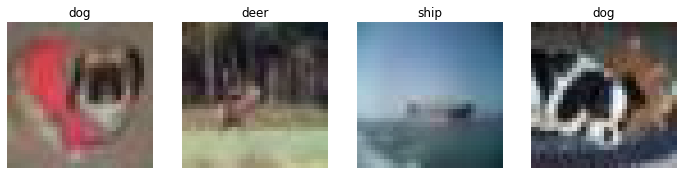

In [19]:
dls.valid.show_batch(max_n=4,nrows=1)

In [21]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.641431,2.059708,0.648000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,1.966023,1.728160,0.569000,00:17
1,1.614245,1.545280,0.512667,00:19
2,1.327765,1.407087,0.466000,00:18
3,1.034575,1.344195,0.437000,00:17
4,0.752412,1.379080,0.423333,00:18
5,0.533110,1.395872,0.400667,00:18
6,0.385550,1.460606,0.398667,00:18
7,0.265356,1.514068,0.394667,00:18
8,0.208918,1.517846,0.387000,00:18
9,0.178362,1.526634,0.388000,00:18


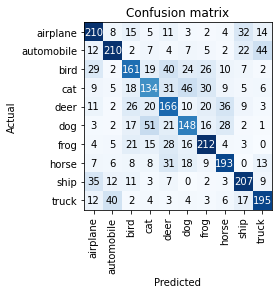

In [24]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

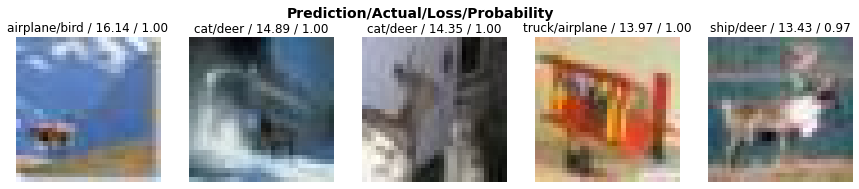

In [25]:
interp.plot_top_losses(5,nrows=1)

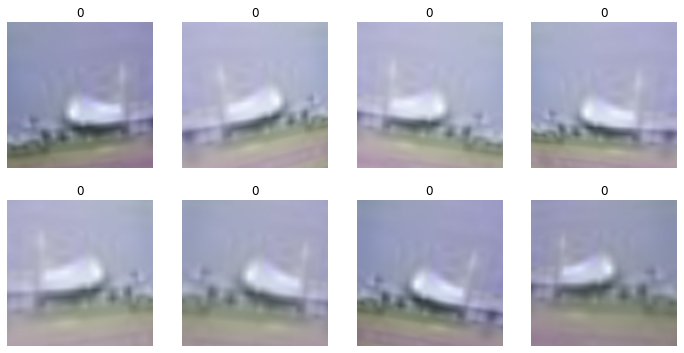

In [30]:
cifar=cifar.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=1))
dls=cifar.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [26]:
learn.export()

In [27]:
path=Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [30]:
from fastai.vision.widgets import *

In [32]:
cleaner=ImageClassifierCleaner(learn)

In [33]:
cleaner

In [78]:
btn_upload=FileUpload()

In [79]:
btn_upload

FileUpload(value={}, description='Upload')

In [70]:
img=PILImage.create(btn_upload.data[-1])

IndexError: list index out of range

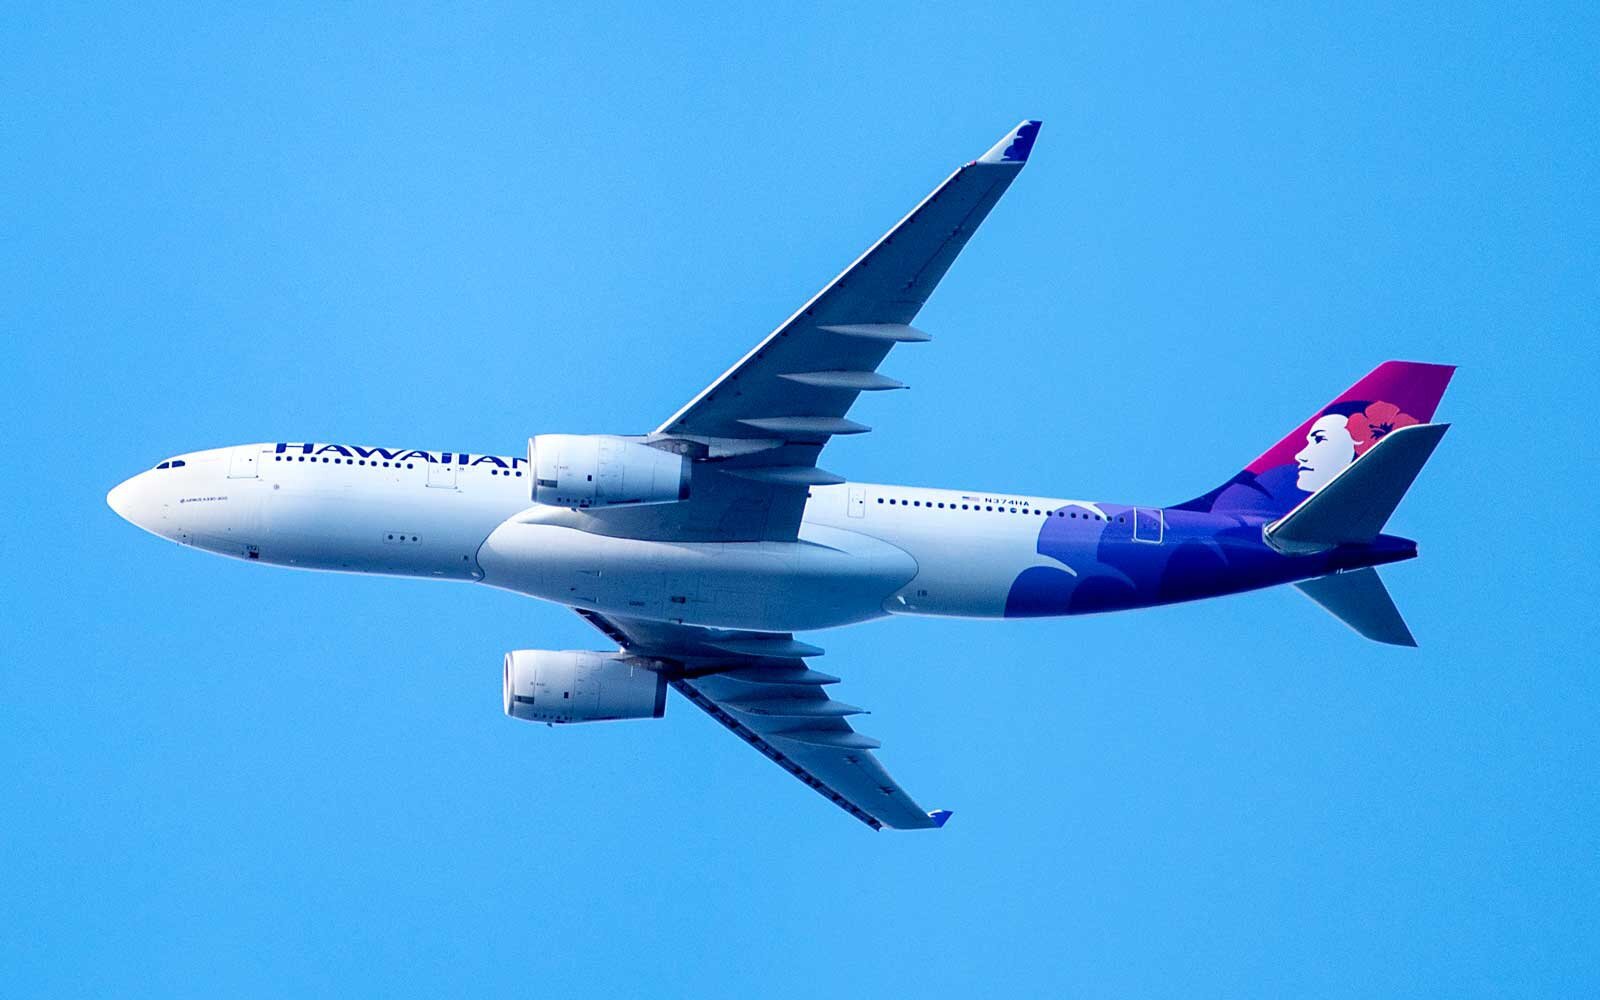

In [71]:
img

In [80]:
out=Output()
out.clear_output()
out

Output()

In [40]:
with out:display(img.to_thumb(32,32))

In [81]:
lb=Label()
lb.value="Please Choose the Image"
lb

Label(value='Please Choose the Image')

In [82]:
btn_run=Button(description="Let's Begin")
btn_run

Button(description="Let's Begin", style=ButtonStyle())

In [75]:
from PIL import Image

In [83]:
def on_click_classify(change):
    img=PILImage.create(btn_upload.data[-1])
    out.clear_output()
    with out:display(img.to_thumb(32,32))
    pred,pred_idx,probs=learn.predict(img)
    lb.value=f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
btn_run.on_click(on_click_classify)

In [85]:
VBox([widgets.Label("Select you Bear!"),btn_upload,btn_run,out,lb])

In [86]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7665 sha256=963bf9a5c42adda79ba3e5743289e01158408082dbfce25ba1799fee3874d467
  Stored in directory: c:\users\turing\appdata\local\pip\cache\wheels\41\11\53\911724983aa48deb94792432e14e518447212dd6c5477d49d3
Successfully built contextvars


Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: C:\Users\Turing\anaconda3\envs\fastai\etc\jupyter
    - Validating...
      voila 0.2.10 ok
